# Classificando quais quedas são periogosas

Levando em consiração diferentes alturas, em planetas diferentes, utilizo um modelo de Perceptron para classificar quais quedas são perigosas.

* Caso a velocidade seja maior que 15 m/s, consideramos uma altura perigosa
* Velocidade é dada por $v=\sqrt{2gh}$


## Bibliotecas
* Matplotlib
* Sklearn
* Numpy

## Objetivo
Traçar uma reta que separe de maneira eficiente as classes seguro e perigoso, visto que existe a possibilidade de traçar uma reta que separe as classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Dados: [altura (m), gravidade (m/s²)]
X = np.array([
    [5, 9.8], [20, 9.8], [50, 9.8],
    [10, 3.7], [30, 3.7],
    [5, 24.8], [15, 24.8],
    [3, 1.6], [12, 1.6],
])

# Classe: 1 se v > 15 m/s, senão 0
v = np.sqrt(2 * X[:, 1] * X[:, 0])
y = (v > 15).astype(int)

In [3]:
# Normalização
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [4]:
# Modelo
model = Perceptron(max_iter=1000, eta0=0.1, tol=1e-3, random_state=0)
model.fit(X_norm, y)

# Previsões e acurácia
y_pred = model.predict(X_norm)
acuracia = accuracy_score(y, y_pred)

print("Pesos finais:", model.coef_)
print("Bias final:", model.intercept_)
print(f"\nAcurácia do modelo: {acuracia * 100:.2f}%")

Pesos finais: [[0.13191489 0.15258621]]
Bias final: [-0.1]

Acurácia do modelo: 100.00%


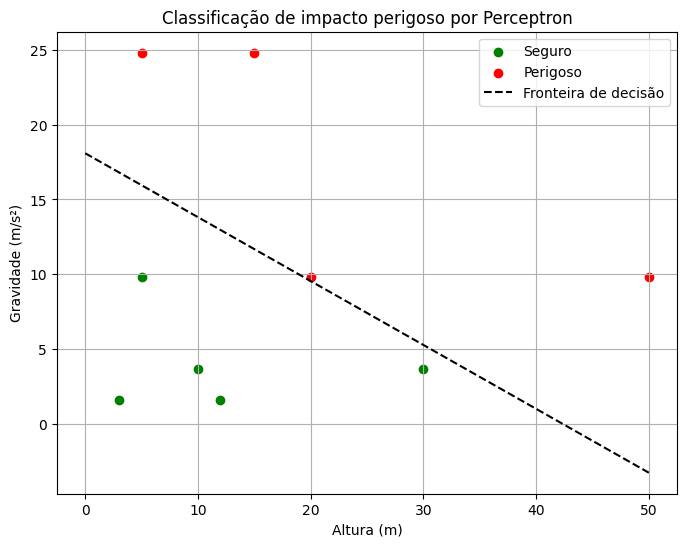

In [5]:
plt.figure(figsize=(8,6))
for i in range(len(X)):
    color = 'red' if y[i] else 'green'
    label = 'Perigoso' if y[i] and i == y.tolist().index(1) else ('Seguro' if not y[i] and i == y.tolist().index(0) else '')
    plt.scatter(X[i, 0], X[i, 1], color=color, label=label)

# Fronteira de decisão
x_vals = np.linspace(0, np.max(X[:, 0]), 100)
x_norm = (x_vals - X[:, 0].min()) / (X[:, 0].max() - X[:, 0].min())
y_norm = -(model.coef_[0][0] * x_norm + model.intercept_[0]) / model.coef_[0][1]
y_vals = y_norm * (X[:, 1].max() - X[:, 1].min()) + X[:, 1].min()

plt.plot(x_vals, y_vals, 'k--', label='Fronteira de decisão')
plt.xlabel("Altura (m)")
plt.ylabel("Gravidade (m/s²)")
plt.title("Classificação de impacto perigoso por Perceptron")
plt.legend()
plt.grid(True)
plt.show()